<a href="https://colab.research.google.com/github/Yang-Hyun-Jun/Machine-Learning-2022/blob/master/assignment_03_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient of Image

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')

In [4]:
I0 = img.imread('test.jpeg')
print(I0.shape)

(510, 512, 3)


## check the size of the input image

In [5]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
num_row     = 512
num_column  = 512
num_channel = 3
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  512
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel

In [11]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = I0.mean(axis=-1)
    
    
num_row     = 512
num_column  = 512
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

number of rows of I =  512
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [18]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = (I-I.min())/(I.max()-I.min())

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [69]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks

    D[:-1] = I[:-1] - np.roll(I, shift=-1, axis=0)[:-1]
    
    # loop
    # for x in range(I.shape[0]-1):
    #   for y in range(I.shape[1]):
    #     D[x, y] = I[x+1, y] - I[x, y]

    #Boundary condition에 의해 D[-1, y] = 0
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x-1, y] $ 

In [71]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    D[1:] = I[1:] - np.roll(I, shift=1, axis=0)[1:]

    # loop
    #for x in range(1, I.shape[0]):
    #  for y in range(I.shape[1]):
    #    D[x, y] = I[x, y] - I[x-1, y]
    
    #Boundary condition에 의해 D[0, y] = 0
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

In [31]:
def compute_derivative_x_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    D[1:-1] = (I[:-2] - np.roll(I, shift=-2, axis=0)[:-2])/2

    #loop
    #for x in range(1, I.shape[0]-1):
    #  for y in range(I.shape[1]):
    #    D[x, y] = (I[x+1, y] - I[x-1, y])/2

    #Boundary condition에 의해 D[0, y] = D[-1, y] = 0
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [79]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks

    D[:, :-1] = I[:, :-1] - np.roll(I, shift=-1, axis=1)[:, :-1]

    #loop
    #for x in range(I.shape[0]):
    #  for y in range(I.shape[1]-1):
    #    D[x, y] = I[x, y+1] - I[x, y]
    
    #Boundary condition에 의해 D[x, -1] = 0
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [33]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    D[:, 1:] = I[:, 1:] - np.roll(I, shift=1, axis=1)[:, 1:]


    #loop
    #for x in range(I.shape[0]):
    #  for y in range(1, I.shape[1]):
    #    D[x, y] = I[x, y] - I[x, y-1]
    
    
    
    #Boundary condition에 의해 D[x, 0] = 0
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [75]:
def compute_derivative_y_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    D[:, 1:-1] = (I[:, :-2] - np.roll(I, shift=-2, axis=1)[:, :-2])/2


    #loop
    #for x in range(I.shape[0]):
    #  for y in range(1, I.shape[1]-1):
    #    D[x, y] = I[x, y+1] - I[x, y-1]
    
    
    
    #Boundary condition에 의해 D[x, -1] = D[x, 0] = 0
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $

In [76]:
def compute_norm_gradient_central(I):
    
    norm_gradient = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    x_gradient = np.zeros(I.shape)
    y_gradient = np.zeros(I.shape)

    x_gradient[1:-1] = (I[:-2] - np.roll(I, shift=-2, axis=0)[:-2])/2
    y_gradient[:, 1:-1] = (I[:, :-2] - np.roll(I, shift=-2, axis=1)[:, :-2])/2

    norm_gradient = x_gradient**2 + y_gradient**2
    #loop
    #for x in range(1, I.shape[0]-1):
    #  for y in range(I.shape[1]):
    #    x_gradient[x, y] = (I[x+1, y] - I[x-1, y])/2

    #for x in range(I.shape[0]):
    #  for y in range(1, I.shape[1]-1):
    #    y_gradient[x, y] = (I[x, y+1] - I[x, y-1])/2
      
    #for x in range(norm_gradient.shape[0]):
    #  for y in range(norm_gradient.shape[1]):
    #    norm_gradient[x, y] = x_gradient[x, y]**2 + y_gradient[x, y]**2

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return norm_gradient

___

___

## functions for presenting the results

___

___

In [54]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [55]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [56]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [57]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [58]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [42]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [43]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [44]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [45]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [46]:
def function_result_10():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()

In [47]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [48]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [49]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [50]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [51]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [52]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [53]:
def function_result_17():

    D = compute_norm_gradient_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


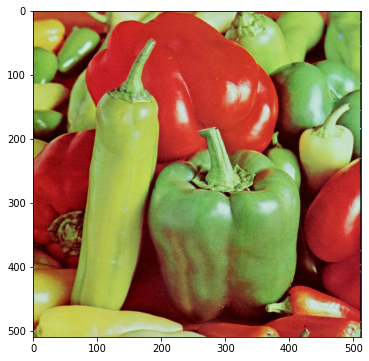

**************************************************
## [RESULT 02]
**************************************************


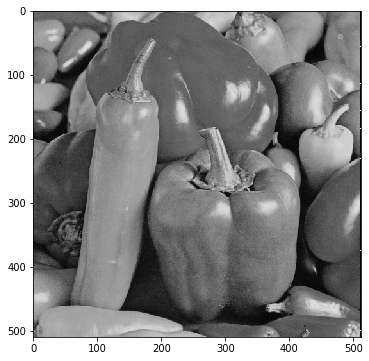

**************************************************
## [RESULT 03]
**************************************************


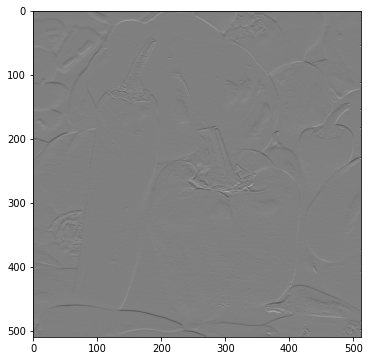

**************************************************
## [RESULT 04]
**************************************************


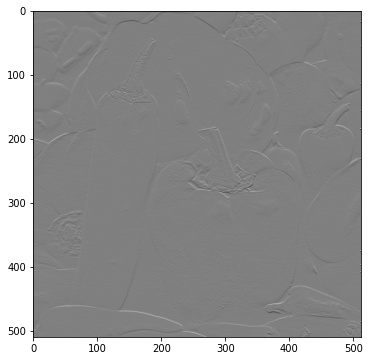

**************************************************
## [RESULT 05]
**************************************************


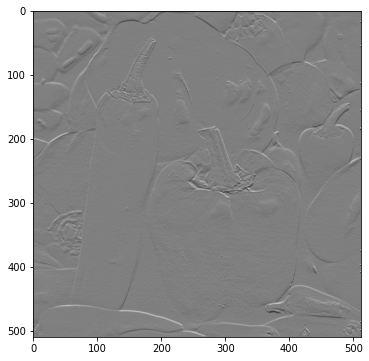

**************************************************
## [RESULT 06]
**************************************************


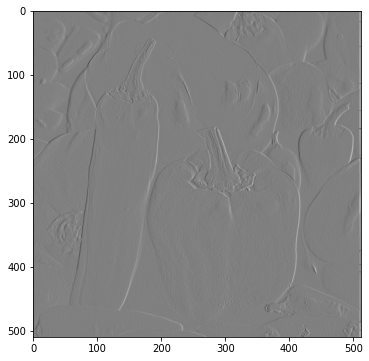

**************************************************
## [RESULT 07]
**************************************************


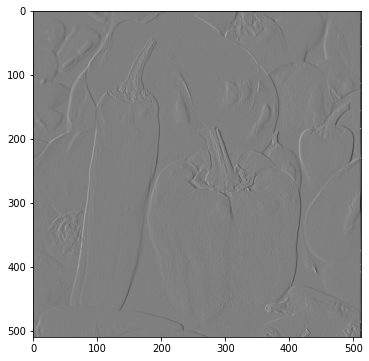

**************************************************
## [RESULT 08]
**************************************************


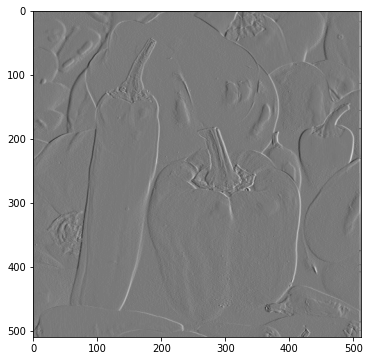

**************************************************
## [RESULT 09]
**************************************************


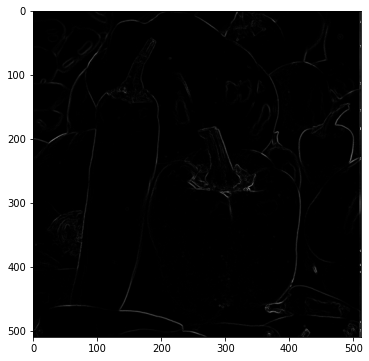

**************************************************
## [RESULT 10]
**************************************************


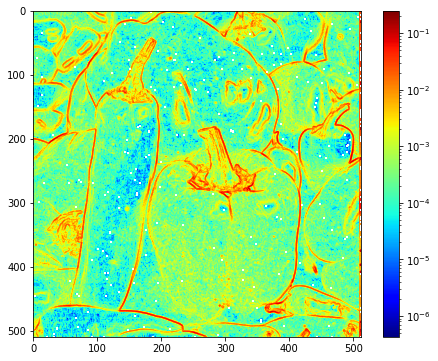

**************************************************
## [RESULT 11]
**************************************************
value1 =  0.007853403141361237
value2 =  0.0
value3 =  0.005235602094240843
value4 =  -0.011780104712041883
**************************************************
## [RESULT 12]
**************************************************
value1 =  0.0
value2 =  0.0026178010471204186
value3 =  0.01570680628272253
value4 =  -0.013089005235602025
**************************************************
## [RESULT 13]
**************************************************
value1 =  0.0
value2 =  0.0
value3 =  0.005235602094240843
value4 =  -0.0006544502617800707
**************************************************
## [RESULT 14]
**************************************************
value1 =  0.03534031413612565
value2 =  0.0
value3 =  0.017015706806282727
value4 =  0.0
**************************************************
## [RESULT 15]
**************************************************
value1 =  0.0
valu

In [81]:
number_result = 17

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)